# Recruitment Fraud Detection using Random Forest

![](https://cdn-images-1.medium.com/max/2000/1*iIx75bixLRbE45mXkH2oCg.png/)

## Import needed dependencies :

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the preprocessed dataset:

Download the preprocessed dataset [Download](https://drive.google.com/file/d/1rzbDYv3tYLQ7J-P3cgG7mHVwxWzgBwdr/view?usp=sharing)

In [3]:
data = pd.read_csv("job_descriptions_dataset.csv")

In [4]:
new_data = data.replace(np.nan, "", regex=True)
new_data.loc[new_data['fraudulent'] == 't'] 

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,#URL_MASKED#,...,"\n \n \nIC ;E Technician | Bakersfield, CA Mt...","Qualifications \nKnowledge, Skills ; Abilitie...",BENEFITS \nWhat is offered: \n \nCompetitive c...,t,t,t,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,t,f
144,Forward Cap.,,,,,The group has raised a fund for the purchase o...,,,f,f,f,,,,,,t,t
173,Technician Instrument & Controls,US,Power Plant & Energy,,\nNAME_MASKED International and Refined Resou...,"Technician Instrument ; , TXLocation Name: NR...",JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",t,t,t,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,t,f
180,Sales Executive,"PK, SD, NAME_MASKED",Sales,,,Sales Executive,Sales Executive,Sales Executive,f,f,f,,,,,Sales,t,t
215,IC&E Technician Mt NAME_MASKED,"US, CA, Bakersfield, CA / Mt. NAME_MASKED",Oil & Energy,#URL_MASKED#,...,"\n \n \nIC ;E Technician | Bakersfield, CA Mt...","Qualifications \nKnowledge, Skills ; Abiliti...",BENEFITS \nWhat is offered: \n \nCompetitive c...,t,t,t,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,t,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, NAME_MASKED",,,,Student Positions Part-Time and Full-Time.You ...,,,f,f,f,Part-time,,,,,t,t
17828,Sales Associate,"AU, NSW, NAME_MASKED",Sales and Marketing,,,LEARN TO EARN AN EXECUTIVE LEVEL INCOME \nFULL...,What You Can Do. \n \n• Have the potential to...,Who We Are \n \nWe are a Global Leadership De...,f,f,t,,,,,,t,t
17829,Android Developer,"PL, MZ, NAME_MASKED",,,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,\nattractive salary (adequate to the candidat...,f,f,f,,,,,,t,t
17830,Payroll Clerk,"US, NY, New York",,,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,f,f,f,Full-time,,,Apparel & Fashion,Accounting/Auditing,t,t


In [5]:
new_data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, -winning online food c...",\nExperience with content management systems ...,,t,t,f,Other,Internship,,,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - NAME_MASKED - Awesome!Do...,What we expect from you: \nYour key responsibi...,What you will get from us \nThrough being part...,t,t,f,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, NAME_MASKED",,,\nNAME_MASKED Services provides Workforce Sol...,"Our client, located in Houston, is actively se...",\nImplement pre-commissioning and commissioni...,,t,t,f,,,,,,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,\n \nEDUCATION: Bachelor’s or Master’s in GIS...,Our culture is anything but corporate—we have ...,t,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager \nLOCATI...,QUALIFICATIONS: \n \nRN license in the State o...,Full Benefits Offered,t,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,,NAME_MASKED is looking for some awesome new ta...,Just in case this is the first time you’ve vis...,To ace this role you: \n \nWill eat comprehens...,What can you expect from us? \nWe have an open...,t,t,t,Full-time,Mid-Senior level,,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,\nThe Payroll Accountant will focus primarily...,\n- B.A. or B.S. in Accounting \n- Desire to ...,\nHealth ; Wellness \n \nMedical plan \nPres...,t,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,\nAt least 12 years professional experience. ...,,f,f,f,Full-time,,,,,f,f
17878,Graphic Designer,"NG, LA, NAME_MASKED",,,,NAME_MASKED Studios is looking for an experien...,1. Must be fluent in the latest versions of NA...,Competitive salary (compensation will be based...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


In [6]:
feature_example = ['description', 'benefits', 'requirements', 'company_profile']

In [7]:
def clean_sequence(string):
    string = string.encode("ascii", "ignore").decode()
    string_words = word_tokenize(string)
    return len([word for word in string_words if word.lower() not in stop_words])

#clean_sequence("àa string withé fuünny charactersß.")

In [8]:
new_data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [13]:
def dataclean(data):
    data = data.replace(np.nan, "", regex=True)
    data_Fraud = data[data['fraudulent']=='t']
    data_NonFraud =  data[data['fraudulent']=='f']    
    data['fraudulent'].value_counts()
    df_fraud_example = pd.concat([data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                  data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                  data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                 data_Fraud, data_Fraud, data_Fraud, data_Fraud, 
                                 data_Fraud, data_Fraud, data_Fraud, data_Fraud, ], axis = 0)
    data_balanced = pd.concat([data_NonFraud, df_fraud_example], axis = 0)
    data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)
    data_balanced['fraudulent'] = np.where(data_balanced['fraudulent']=='t', 1, 0)
    data_balanced['telecommuting'] = np.where(data_balanced['telecommuting']=='t', 1, 0)
    data_balanced['has_company_logo'] = np.where(data_balanced['has_company_logo']=='t', 1, 0)
    data_balanced['has_questions'] = np.where(data_balanced['has_questions']=='t', 1, 0)
    data_balanced['description'] = data_balanced['description'].apply(lambda x: clean_sequence(str(x)))
    data_balanced['benefits'] = data_balanced['benefits'].apply(lambda x: clean_sequence(str(x)))
    data_balanced['requirements'] = data_balanced['requirements'].apply(lambda x: clean_sequence(str(x)))
    data_balanced['company_profile'] = data_balanced['company_profile'].apply(lambda x: clean_sequence(str(x)))
    
    y_train = data_balanced.loc[:, ['fraudulent']].values
    data_balanced.drop(columns=['industry', 'function', 'department', 'salary_range', 'title', 'employment_type', 
                                'location', 'required_experience', 'required_education', 'in_balanced_dataset', 'fraudulent'], 
                                   axis=1, inplace=True)
    df_train = data_balanced
    return df_train, y_train 



In [10]:
import os

os.getcwd()

'/workspace/sean/FraudDection'

In [11]:
datafile = "job_descriptions_dataset.csv"
data = pd.read_csv(datafile)
sample = data.head(216)

In [14]:
df_train, y_train = dataclean(data)

In [15]:
df_train, y_train

(       company_profile  description  requirements  benefits  telecommuting  \
 0                  133          168           107       111              1   
 1                  124          256            60        67              1   
 2                   57          230           146        15              1   
 3                   68          210            97         0              1   
 4                    0           57             0         0              0   
 ...                ...          ...           ...       ...            ...   
 34329               41          250           315         0              1   
 34330                0          105            49        45              0   
 34331               23          120            25        22              1   
 34332               40           47            46        10              1   
 34333                0          454            80        22              0   
 
        has_company_logo  has_questions  
 0      

In [16]:
y = y_train #dataset['Survived']
X = df_train #dataset.drop(['Survived'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1995)

In [17]:
 test_X

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions
6825,0,116,75,36,0,0,0
14681,0,49,24,74,0,0,0
127,82,155,62,147,1,1,1
14832,76,258,67,135,1,1,1
18172,0,335,0,0,0,0,0
...,...,...,...,...,...,...,...
9742,156,44,66,25,1,1,0
2111,0,257,0,0,0,0,0
4423,0,130,28,0,0,0,0
5289,0,318,0,0,0,0,1


## Set the parameters for the random forest model :

In [18]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 10, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

## Define the model :

In [19]:
RF_model = RandomForestClassifier(**parameters)

## Train the model :

In [20]:
RF_model.fit(train_X, train_y)

<ipython-input-20-23032f0b959e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=10)

## Test the trained model on test data :

In [21]:
RF_predictions = RF_model.predict(test_X)

In [22]:
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.8159580663948748


In [23]:
scores_all = []
treeNums =[]
for i in range(10):
    parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': (i+1)*20, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

    RF_model = RandomForestClassifier(**parameters)
    RF_model.fit(train_X, train_y)
    RF_predictions = RF_model.predict(test_X)
    score = accuracy_score(test_y ,RF_predictions)
    treeNums.append((i+1)*20)
    scores_all.append(score)
    print(score)

<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8211997670355271


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8258590564938847


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8363424577751892


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8363424577751892


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8337216074548631


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8302271403610949


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8340128130460105


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8328479906814211


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8354688410017472


<ipython-input-23-ba221bdeb54a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


0.8293535235876529


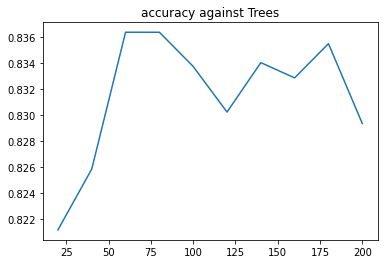

In [24]:
import matplotlib.pyplot as plt
plt.title("accuracy against Trees")
plt.plot(treeNums, scores_all)


## Hyperparameters of Sklearn Random forest classifier[[2]](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) :

*	**bootstrap** : boolean, optional (default=True)

> Whether bootstrap samples are used when building trees.

*	**min_samples_leaf** : int, float, optional (default=1)

> The minimum number of samples required to be at a leaf node:

> - If int, then consider min_samples_leaf as the minimum number.

> - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* **n_estimators** : integer, optional (default=10)
> The number of trees in the forest.

* 	**min_samples_split** :  int, float, optional (default=2)
> The minimum number of samples required to split an internal node:

> - If int, then consider min_samples_split as the minimum number.
> -	If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

*	**max_features** : int, float, string or None, optional (default=”auto”)
> The number of features to consider when looking for the best split:

> -	If int, then consider max_features features at each split.
> -If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
> -	If “auto”, then max_features=sqrt(n_features).
> -	If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
> -	If “log2”, then max_features=log2(n_features).
> -	If None, then max_features=n_features.


*	**max_depth** :  integer or None, optional (default=None)
> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


*	**max_leaf_nodes** : int or None, optional (default=None)
> Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


If you want to learn more about the rest of hyperparameters , check out  [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)
<ipython-input-22-d7ecfa4713de>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(train_X, train_y)


1.0
1.0


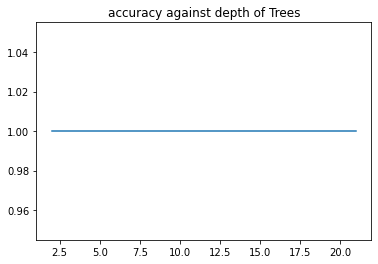

In [22]:
scores_all = []
max_depth_all =[]
scores_train =[]
for i in range(20):
    parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': i + 2,
              'max_leaf_nodes': None}

    RF_model = RandomForestClassifier(**parameters)
    RF_model.fit(train_X, train_y)
    RF_predictions_train = RF_model.predict(train_X)
    scores_train.append(accuracy_score(train_y ,RF_predictions_train))
    RF_predictions = RF_model.predict(test_X)
    score = accuracy_score(test_y ,RF_predictions)
    max_depth_all.append((i+2))
    scores_all.append(score)
    print(score)

plt.title("accuracy against depth of Trees")
plt.plot(max_depth_all, scores_all)

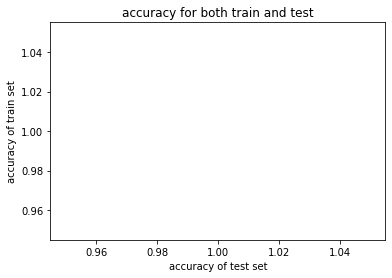

In [23]:
plt.title("accuracy for both train and test")
plt.xlabel("accuracy of test set")
plt.ylabel("accuracy of train set")
plt.plot(scores_all,scores_train)
